# Projet Machine Learning - Fabien Castellini/Paul-Antoine Charbit

# 1- Présentation de la problématique du challenge

# 2- Décomposition des données

In [63]:
# Les packages
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Les données de l'échantillon d'essai

#Données équipes
train_home_team_statistics_df = pd.read_csv('C:/Users/FABIEN/Documents/Dauphine/Machine Learning/Train_Data/train_home_team_statistics_df.csv', index_col=0)
train_away_team_statistics_df = pd.read_csv('C:/Users/FABIEN/Documents/Dauphine/Machine Learning/Train_Data/train_away_team_statistics_df.csv', index_col=0)

#Données résultats des matchs
train_scores = pd.read_csv('C:/Users/FABIEN/Documents/Dauphine/Machine Learning/Y_train.csv', index_col=0)


# 3- Les features

In [28]:
# Données joueurs
file_paths = [
    'C:/Users/FABIEN/Documents/Dauphine/Machine Learning/Train_Data/train_home_player_statistics_df.csv',
    'C:/Users/FABIEN/Documents/Dauphine/Machine Learning/Train_Data/train_away_player_statistics_df.csv'
]

# Lecture des fichiers et traitement des données
dfs = []
for file_path in file_paths:
    df = pd.read_csv(file_path, index_col=0)
    #On enlève les colonnes qui ne sont pas des métriques
    numerical_stats = df.drop(df.columns[0:4], axis=1).fillna(0)
    #Calcul de la moyenne par métrique et par équipe en utilisant la colonne "ID"
    stats = numerical_stats.groupby("ID").mean().reset_index()
    dfs.append(stats)

# Séparation des données pour les équipes à domicile et à l'extérieur
stats_home = dfs[0]
stats_away = dfs[1]
stats_home

,ID,PLAYER_ACCURATE_CROSSES_season_sum,PLAYER_ACCURATE_PASSES_season_sum,PLAYER_AERIALS_WON_season_sum,PLAYER_ASSISTS_season_sum,PLAYER_BIG_CHANCES_CREATED_season_sum,PLAYER_BIG_CHANCES_MISSED_season_sum,PLAYER_BLOCKED_SHOTS_season_sum,PLAYER_CAPTAIN_season_sum,PLAYER_CLEARANCES_season_sum,...,PLAYER_STARTING_LINEUP_5_last_match_std,PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std,PLAYER_TACKLES_5_last_match_std,PLAYER_TOTAL_CROSSES_5_last_match_std,PLAYER_TOTAL_DUELS_5_last_match_std,PLAYER_YELLOWCARDS_5_last_match_std,PLAYER_PUNCHES_5_last_match_std,PLAYER_LONG_BALLS_5_last_match_std,PLAYER_LONG_BALLS_WON_5_last_match_std,PLAYER_SHOTS_OFF_TARGET_5_last_match_std
0,0,10.222222,21.333333,15.277778,7.777778,7.222222,6.166667,9.222222,5.055556,16.722222,...,34.611111,22.722222,23.944444,13.888889,37.000000,39.444444,0.0,0.0,0.0,0.0
1,1,9.222222,31.555556,14.555556,16.666667,10.277778,9.000000,11.888889,5.555556,17.166667,...,3.500000,10.000000,13.611111,8.666667,22.055556,19.833333,0.0,0.0,0.0,0.0
2,2,8.434783,16.608696,15.347826,2.826087,3.652174,3.869565,8.826087,0.434783,12.826087,...,51.304348,12.434783,22.913043,10.956522,33.652174,35.000000,0.0,0.0,0.0,0.0
3,3,8.888889,34.055556,15.833333,12.000000,14.444444,8.722222,7.444444,4.388889,19.333333,...,19.833333,8.833333,19.111111,17.055556,19.611111,15.555556,0.0,0.0,0.0,0.0
4,4,9.722222,25.888889,15.111111,8.166667,9.500000,10.666667,9.611111,5.555556,17.555556,...,18.277778,18.166667,23.000000,14.555556,20.888889,13.777778,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12298,12298,4.833333,23.888889,11.444444,5.444444,2.000000,3.111111,11.277778,4.833333,15.666667,...,46.111111,8.555556,18.166667,11.722222,27.166667,37.333333,0.0,0.0,0.0,0.0
12299,12299,3.833333,15.666667,16.444444,5.388889,5.500000,7.000000,12.277778,2.777778,18.277778,...,31.888889,10.666667,18.555556,11.388889,23.888889,42.388889,0.0,0.0,0.0,0.0
12300,12300,6.000000,16.000000,9.777778,7.222222,8.388889,6.000000,15.444444,4.777778,10.833333,...,49.388889,20.666667,38.166667,7.611111,24.333333,18.277778,0.0,0.0,0.0,0.0
12301,12301,0.000000,0.000000,0.000000,12.888889,0.000000,0.000000,0.000000,5.277778,0.000000,...,42.388889,0.000000,0.000000,0.000000,0.000000,34.611111,0.0,0.0,0.0,0.0


<Axes: xlabel='PLAYER_RATING_season_average', ylabel='PLAYER_PASSES_season_average'>

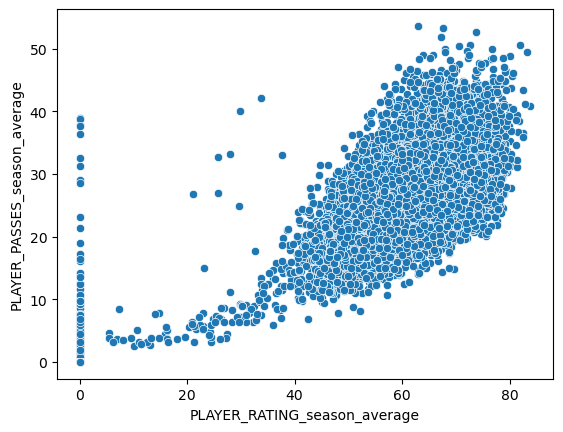

In [5]:
#Statistiques: relation entre note moyenne et nombre de passe moyen par saison
sns.scatterplot(data=stats_home, x='PLAYER_RATING_season_average', y='PLAYER_PASSES_season_average')

In [24]:
results = []
#Boucle sur chaque métrique
for colonne in train_home_team_statistics_df.columns[2:]:
    home_col = train_home_team_statistics_df[colonne]
    away_col = train_away_team_statistics_df[colonne]
    diff_col = home_col - away_col

    # Créer un DataFrame pour stocker les prédictions
    predictions_df = pd.DataFrame({
        'predic_home': np.where(diff_col > 0, 1, 0),
        'predic_draw': np.where(diff_col == 0, 1, 0),
        'predic_away': np.where(diff_col < 0, 1, 0)
    })
    #On ajoute chaque taux de prédiction à la liste
    results.append(np.round(accuracy_score(predictions_df, train_scores), 4).tolist())

In [25]:
# Créer un DataFrame à partir des noms de colonnes avec les résultats calculés
nouveau_df = (
    train_home_team_statistics_df.columns.to_frame()
    .stack()
    .reset_index(drop=True)
    .to_frame(name='Nom de la colonne')
)

# Ignorer les deux premières lignes
nouveau_df = nouveau_df.iloc[2:]

# Ajouter les résultats calculés
nouveau_df['results'] = results
nouveau_df

,Nom de la colonne,results
2,TEAM_SHOTS_TOTAL_season_sum,0.4338
3,TEAM_SHOTS_INSIDEBOX_season_sum,0.4063
4,TEAM_SHOTS_OFF_TARGET_season_sum,0.4305
5,TEAM_SHOTS_ON_TARGET_season_sum,0.4489
6,TEAM_SHOTS_OUTSIDEBOX_season_sum,0.3512
...,...,...
137,TEAM_SUBSTITUTIONS_5_last_match_std,0.3351
138,TEAM_BALL_SAFE_5_last_match_std,0.2968
139,TEAM_DANGEROUS_ATTACKS_5_last_match_std,0.3812
140,TEAM_INJURIES_5_last_match_std,0.2464


In [15]:
# Trouver l'index de la ligne avec la plus grande valeur dans la colonne "results"
index_max_value = nouveau_df['results'].idxmax()

# Récupérer le nom de la colonne correspondant à cet index
nom_colonne_max_value = nouveau_df.loc[index_max_value, 'Nom de la colonne']
nom_colonne_max_value

'TEAM_SHOTS_ON_TARGET_season_average'

In [17]:
# Trouver l'index de la ligne avec la plus petite valeur dans la colonne "results"
index_min_value = nouveau_df['results'].idxmin()

# Récupérer le nom de la colonne correspondant à cet index
nom_colonne_min_value = nouveau_df.loc[index_min_value, 'Nom de la colonne']
nom_colonne_min_value

'TEAM_INJURIES_5_last_match_std'

In [16]:
#Meilleur taux de prédiction
valeur_max = nouveau_df.loc[index_max_value, 'results']
valeur_max

0.4514

In [18]:
#Pire taux de prédiction
valeur_min = nouveau_df.loc[index_min_value, 'results']
valeur_min

0.2464

In [21]:
nouveau_df['ecart_abs'] = abs(nouveau_df['results'] - 0.33)
# Trier le DataFrame en fonction de la colonne "ecart_abs" par ordre décroissant
nouveau_df_trie = nouveau_df.sort_values(by='ecart_abs', ascending=False)

# Imprimer les cinq premières lignes
print("Les cinq lignes ayant la plus grande valeur de la colonne 'ecart_abs' :")
print(nouveau_df_trie.head(5))

Les cinq lignes ayant la plus grande valeur de la colonne 'ecart_abs' :
                      Nom de la colonne  results  ecart_abs
28  TEAM_SHOTS_ON_TARGET_season_average   0.4514     0.1214
47         TEAM_GAME_WON_season_average   0.4497     0.1197
35  TEAM_BALL_POSSESSION_season_average   0.4496     0.1196
5       TEAM_SHOTS_ON_TARGET_season_sum   0.4489     0.1189
22             TEAM_GAME_WON_season_sum   0.4475     0.1175


In [29]:
results2 = []
#Boucle sur chaque métrique
for colonne in stats_home.columns[2:]:
    home_col2 = stats_home[colonne]
    away_col2 = stats_away[colonne]
    diff_col2 = home_col2 - away_col2

    # Créer un DataFrame pour stocker les prédictions
    predictions_df2 = pd.DataFrame({
        'predic_home': np.where(diff_col2 > 0, 1, 0),
        'predic_draw': np.where(diff_col2 == 0, 1, 0),
        'predic_away': np.where(diff_col2 < 0, 1, 0)
    })
    #On ajoute chaque taux de prédiction à la liste
    results2.append(np.round(accuracy_score(predictions_df2, train_scores), 4).tolist())

In [30]:
# Créer un DataFrame à partir des noms de colonnes avec les résultats calculés
nouveau_df2 = (
    stats_home.columns.to_frame()
    .stack()
    .reset_index(drop=True)
    .to_frame(name='Nom de la colonne')
)

# Ignorer les deux premières lignes
nouveau_df2 = nouveau_df2.iloc[2:]

# Ajouter les résultats calculés
nouveau_df2['results'] = results2
nouveau_df2

,Nom de la colonne,results
2,PLAYER_ACCURATE_PASSES_season_sum,0.4344
3,PLAYER_AERIALS_WON_season_sum,0.3639
4,PLAYER_ASSISTS_season_sum,0.4460
5,PLAYER_BIG_CHANCES_CREATED_season_sum,0.4301
6,PLAYER_BIG_CHANCES_MISSED_season_sum,0.4225
...,...,...
298,PLAYER_YELLOWCARDS_5_last_match_std,0.3642
299,PLAYER_PUNCHES_5_last_match_std,0.2776
300,PLAYER_LONG_BALLS_5_last_match_std,0.2590
301,PLAYER_LONG_BALLS_WON_5_last_match_std,0.2590


In [35]:
nouveau_df2['ecart_abs'] = abs(nouveau_df2['results'] - 0.33)
# Trier le DataFrame en fonction de la colonne "ecart_abs" par ordre décroissant
nouveau_df_trie2 = nouveau_df2.sort_values(by='ecart_abs', ascending=False)

# Imprimer les cinq premières lignes
print("Les cinq lignes ayant la plus grande valeur de la colonne 'ecart_abs' :")
print(nouveau_df_trie2.head(5))

Les cinq lignes ayant la plus grande valeur de la colonne 'ecart_abs' :
                 Nom de la colonne  results  ecart_abs
54   PLAYER_ASSISTS_season_average   0.4484     0.1184
105      PLAYER_ASSISTS_season_std   0.4475     0.1175
20         PLAYER_GOALS_season_sum   0.4467     0.1167
4        PLAYER_ASSISTS_season_sum   0.4460     0.1160
70     PLAYER_GOALS_season_average   0.4443     0.1143


# 4- Modèle simple : arbre de décision

In [101]:
train_home = train_home_team_statistics_df.iloc[:,2:]
train_away = train_away_team_statistics_df.iloc[:,2:]
train_home.columns = 'HOME_' + train_home.columns
train_away.columns = 'AWAY_' + train_away.columns

train_data =  pd.concat([train_home,train_away],join='inner',axis=1)
train_data = train_data.replace({np.inf:np.nan,-np.inf:np.nan})

train_data

,HOME_TEAM_SHOTS_TOTAL_season_sum,HOME_TEAM_SHOTS_INSIDEBOX_season_sum,HOME_TEAM_SHOTS_OFF_TARGET_season_sum,HOME_TEAM_SHOTS_ON_TARGET_season_sum,HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum,HOME_TEAM_PASSES_season_sum,HOME_TEAM_SUCCESSFUL_PASSES_season_sum,HOME_TEAM_SAVES_season_sum,HOME_TEAM_CORNERS_season_sum,HOME_TEAM_FOULS_season_sum,...,AWAY_TEAM_YELLOWCARDS_5_last_match_std,AWAY_TEAM_REDCARDS_5_last_match_std,AWAY_TEAM_OFFSIDES_5_last_match_std,AWAY_TEAM_ATTACKS_5_last_match_std,AWAY_TEAM_PENALTIES_5_last_match_std,AWAY_TEAM_SUBSTITUTIONS_5_last_match_std,AWAY_TEAM_BALL_SAFE_5_last_match_std,AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_std,AWAY_TEAM_INJURIES_5_last_match_std,AWAY_TEAM_GOALS_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
0,3.0,2.0,5.0,2.0,1.0,2.0,2.0,5.0,3.0,6.0,...,5.0,5.0,4.0,0.0,6.0,8.0,4.0,3.0,2.0,3.0
1,6.0,8.0,3.0,6.0,5.0,8.0,7.0,10.0,6.0,8.0,...,0.0,0.0,3.0,1.0,8.0,4.0,10.0,0.0,5.0,3.0
2,4.0,2.0,5.0,2.0,8.0,1.0,1.0,2.0,2.0,7.0,...,6.0,10.0,4.0,4.0,0.0,8.0,3.0,0.0,9.0,6.0
3,7.0,5.0,5.0,6.0,6.0,9.0,9.0,2.0,2.0,0.0,...,0.0,0.0,1.0,2.0,0.0,5.0,6.0,3.0,NaN,2.0
4,3.0,3.0,2.0,3.0,4.0,4.0,3.0,4.0,4.0,7.0,...,1.0,0.0,4.0,4.0,9.0,4.0,1.0,4.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12298,4.0,2.0,3.0,4.0,7.0,4.0,4.0,3.0,2.0,2.0,...,5.0,5.0,0.0,1.0,6.0,10.0,1.0,1.0,NaN,2.0
12299,4.0,2.0,3.0,1.0,5.0,1.0,1.0,9.0,1.0,10.0,...,7.0,5.0,2.0,2.0,0.0,0.0,1.0,6.0,9.0,1.0
12300,4.0,3.0,5.0,3.0,5.0,1.0,1.0,6.0,1.0,8.0,...,8.0,0.0,3.0,2.0,0.0,0.0,6.0,3.0,4.0,4.0


In [68]:
train_scores = train_scores.loc[train_data.index]
train_scores

,HOME_WINS,DRAW,AWAY_WINS
ID,,,
0,0,0,1
1,0,1,0
2,0,0,1
3,1,0,0
4,0,1,0
...,...,...,...
12298,0,0,1
12299,0,0,1
12300,0,0,1


In [102]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(train_data, train_scores, train_size=0.8, random_state=42)

# Initialiser le classifieur d'arbre de décision
clf = DecisionTreeClassifier()

# Entraîner le classifieur sur les données d'entraînement
clf.fit(X_train, y_train)

# Faire des prédictions sur les données de test
predictions = clf.predict(X_test)

# Calculer l'exactitude des prédictions
accuracy = accuracy_score(y_test, predictions)
print("Exactitude :", accuracy)

Exactitude : 0.36164160910199106


In [97]:
#En utilisant la feature
home = train_data['HOME_' + nom_colonne_max_value]
away = train_data['AWAY_' + nom_colonne_max_value]

#nom_colonne_max_value
#train_data
#df = train_data['AWAY_' + nom_colonne_max_value]
train_data2 =  pd.concat([home, away],join='inner',axis=1)
train_data2

,AWAY_TEAM_SHOTS_ON_TARGET_season_average,HOME_TEAM_SHOTS_ON_TARGET_season_average
ID,,
0,1.0,2.0
1,2.0,5.0
2,2.0,2.0
3,0.0,7.0
4,6.0,2.0
...,...,...
12298,7.0,3.0
12299,1.0,1.0
12300,6.0,3.0


In [103]:
X_train2, X_test2, y_train2, y_test2 = model_selection.train_test_split(train_data2, train_scores, train_size=0.8, random_state=42)

# Initialiser le classifieur d'arbre de décision
clf = DecisionTreeClassifier()

# Entraîner le classifieur sur les données d'entraînement
clf.fit(X_train2, y_train2)

# Faire des prédictions sur les données de test
predictions2 = clf.predict(X_test2)

# Calculer l'exactitude des prédictions
accuracy2 = accuracy_score(y_test2, predictions2)
print("Exactitude :", accuracy2)


Exactitude : 0.2007314099959366
